<a href="https://colab.research.google.com/github/mlartorg/visualML/blob/master/Lucid_Tutorial_for_ml_art.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2018 Google LLC.

Licensed under the Apache License, Version 2.0 (the "License");

In [2]:
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Lucid: A Quick Tutorial

This tutorial quickly introduces [**Lucid**](https://github.com/tensorflow/lucid), a network for visualizing neural networks. Lucid is a kind of spiritual successor to DeepDream, but provides flexible abstractions so that it can be used for a wide range of interpretability research.

**Note**: The easiest way to use this tutorial is [as a colab notebook](https://colab.sandbox.google.com/github/tensorflow/lucid/blob/master/notebooks/tutorial.ipynb), which allows you to dive in with no setup. We recommend you enable a free GPU by going:

> **Runtime**   →   **Change runtime type**   →   **Hardware Accelerator: GPU**

Thanks for trying Lucid!

<img src="https://storage.googleapis.com/lucid-static/common/stickers/channels-visualizations.jpg" width="600"></img>



## Install, Import, Load Model

In [3]:
# Install Lucid

!pip install --quiet lucid>=0.2.3

In [4]:
# Imports
%tensorflow_version 1.x

import numpy as np
import tensorflow as tf
assert tf.__version__.startswith('1')

import lucid.modelzoo.vision_models as models
from lucid.misc.io import show
import lucid.optvis.objectives as objectives
import lucid.optvis.param as param
import lucid.optvis.render as render
import lucid.optvis.transform as transform

TensorFlow 1.x selected.


In [5]:
# Let's import a model from the Lucid modelzoo!

model = models.InceptionV1()
model.load_graphdef()

W0814 20:07:10.642503 139777309624192 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/lucid/misc/io/writing.py:62: The name tf.gfile.MakeDirs is deprecated. Please use tf.io.gfile.makedirs instead.

W0814 20:07:10.649076 139777309624192 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/lucid/misc/io/writing.py:70: The name tf.gfile.Open is deprecated. Please use tf.io.gfile.GFile instead.

W0814 20:07:11.727839 139777309624192 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/lucid/misc/io/loading.py:72: The name tf.GraphDef is deprecated. Please use tf.compat.v1.GraphDef instead.



In this tutorial, we will be visualizing InceptionV1, also known as GoogLeNet.

While we will focus on a few neurons, you may wish to experiment with visualizing others. If you'd like, you can try any of the following layers: `conv2d0, maxpool0, conv2d1, conv2d2, maxpool1, mixed3a, mixed3b, maxpool4, mixed4a, mixed4b, mixed4c, mixed4d, mixed4e, maxpool10, mixed5a, mixed5b`.

You can learn more about GoogLeNet in the [paper](https://www.cs.unc.edu/~wliu/papers/GoogLeNet.pdf). You can also find visualizations of all neurons in mixed3a-mixed5b [here](https://distill.pub/2017/feature-visualization/appendix/).

W0814 20:07:11.860718 139777309624192 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/lucid/optvis/render.py:88: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0814 20:07:13.380018 139777309624192 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/lucid/optvis/param/spatial.py:54: The name tf.spectral.irfft2d is deprecated. Please use tf.signal.irfft2d instead.

W0814 20:07:13.394803 139777309624192 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/lucid/optvis/render.py:223: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0814 20:07:13.396831 139777309624192 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/lucid/optvis/render.py:241: The name tf.train.AdamOptimizer is deprecated. Please use tf.compat.v1.train.AdamOptimizer instead.

W0814 20:07:13.398354 139777309624192 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/

512 2394.777



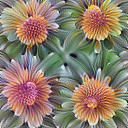

In [6]:
_ = render.render_vis(model, objectives.channel('mixed4b_pool_reduce_pre_relu', 16))

In [7]:
# add some artsy transforms
transforms=[
    transform.random_rotate([137.5 * i % 180 for i in range(17)]),  
    transform.jitter(5), 
    # transform.pad(16),
    transform.random_scale([1.61 * i % 2 for i in range(1, 8)])]

512 3982.369



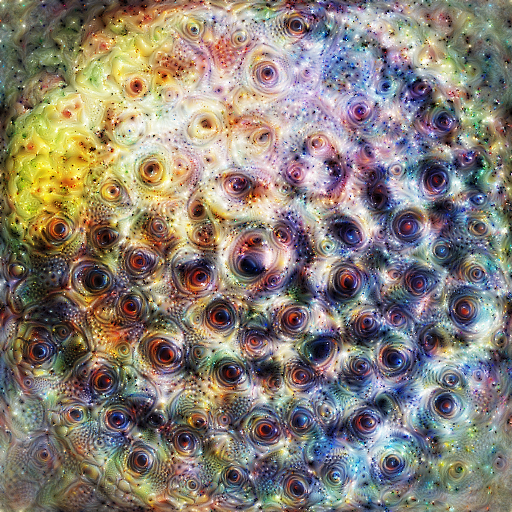

In [8]:
_ = render.render_vis(model, objectives.deepdream('mixed4d'), param_f=lambda: param.image(512), transforms=transforms)
